In [1]:
# import os

# # Carregar variáveis de ambiente
# from dotenv import load_dotenv
# load_dotenv(os.path.join('config', '.env'))

# jana = False
# if jana:
#     db_config = {
#         'host': os.getenv('DB_HOST'),
#         'port': os.getenv('DB_PORT'),
#         'dbname': os.getenv('DB_NAME_JANA'),
#         'user': os.getenv('DB_USER'),
#         'password': os.getenv('DB_PASSWORD')
#     }
# else:
#     db_config = {
#         'host': os.getenv('DB_HOST'),
#         'port': os.getenv('DB_PORT'),
#         'dbname': os.getenv('DB_NAME'),
#         'user': os.getenv('DB_USER'),
#         'password': os.getenv('DB_PASSWORD')
#     }

# from sqlalchemy import create_engine

# # Crie a URL de conexão
# db_url = f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}"

# # Crie o motor de conexão
# engine = create_engine(db_url)

# # Escreva sua consulta SQL
# query = 'SELECT * FROM all_tracks_registry'

# # Leia os dados do banco de dados para um DataFrame do pandas
# df = pd.read_sql(query, engine)
# df.head()

In [2]:
# Importar bibliotecas padrão
import time
import os
# Importar bibliotecas para PySpark
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
# Carregar variáveis de ambiente
from dotenv import load_dotenv
load_dotenv(os.path.join('config', '.env'))

user_name = 'User_1'
user = True if user_name == 'User_1'  else False

start_time_geral = time.time()

if user:
    db_config = {
        'host': os.getenv('DB_HOST'),
        'port': os.getenv('DB_PORT'),
        'dbname': os.getenv('DB_NAME'),
        'user': os.getenv('DB_USER'),
        'password': os.getenv('DB_PASSWORD')
    }

else:
    db_config = {
        'host': os.getenv('DB_HOST'),
        'port': os.getenv('DB_PORT'),
        'dbname': os.getenv('DB_NAME_2'),
        'user': os.getenv('DB_USER'),
        'password': os.getenv('DB_PASSWORD')
        }


# Configurar SparkSession
spark = SparkSession.builder \
    .appName("PostgreSQL to Spark") \
    .config("spark.jars", "/caminho/para/postgresql-<versao>.jar") \
    .getOrCreate()

In [42]:

user

True

In [3]:
# URL de conexão JDBC
jdbc_url = f"jdbc:postgresql://{db_config['host']}:{db_config['port']}/{db_config['dbname']}"

# Propriedades de conexão
connection_properties = {
    "user": db_config['user'],
    "password": db_config['password'],
    "driver": "org.postgresql.Driver"
}

df_spark = spark.read.jdbc(url=jdbc_url, table="all_tracks_registry", properties=connection_properties)
df_spark.show(4)

+-------------------+--------------------+---------+------------+--------------+--------------------------+---------------------------------+--------------------------------+--------------------+------------+-----------------+-------------------+------------+----------+-------+-------+-------+-----------------+--------------+
|                 ts|            platform|ms_played|conn_country|       ip_addr|master_metadata_track_name|master_metadata_album_artist_name|master_metadata_album_album_name|   spotify_track_uri|episode_name|episode_show_name|spotify_episode_uri|reason_start|reason_end|shuffle|skipped|offline|offline_timestamp|incognito_mode|
+-------------------+--------------------+---------+------------+--------------+--------------------------+---------------------------------+--------------------------------+--------------------+------------+-----------------+-------------------+------------+----------+-------+-------+-------+-----------------+--------------+
|2019-11-11 00:1

In [4]:
df_spark.count()

74704

In [5]:
df_spark.printSchema()

root
 |-- ts: timestamp (nullable = true)
 |-- platform: string (nullable = true)
 |-- ms_played: integer (nullable = true)
 |-- conn_country: string (nullable = true)
 |-- ip_addr: string (nullable = true)
 |-- master_metadata_track_name: string (nullable = true)
 |-- master_metadata_album_artist_name: string (nullable = true)
 |-- master_metadata_album_album_name: string (nullable = true)
 |-- spotify_track_uri: string (nullable = true)
 |-- episode_name: string (nullable = true)
 |-- episode_show_name: string (nullable = true)
 |-- spotify_episode_uri: string (nullable = true)
 |-- reason_start: string (nullable = true)
 |-- reason_end: string (nullable = true)
 |-- shuffle: boolean (nullable = true)
 |-- skipped: boolean (nullable = true)
 |-- offline: boolean (nullable = true)
 |-- offline_timestamp: timestamp (nullable = true)
 |-- incognito_mode: boolean (nullable = true)



In [6]:
df_spark_transformado = df_spark.withColumn("ts_transformado", F.col("ts").cast("string")).drop("ts")
df_spark_transformado = df_spark_transformado.withColumn("offline_timestamp_t", F.col("offline_timestamp").cast("string")).drop("offline_timestamp")


In [7]:
df_spark_transformado.printSchema()

root
 |-- platform: string (nullable = true)
 |-- ms_played: integer (nullable = true)
 |-- conn_country: string (nullable = true)
 |-- ip_addr: string (nullable = true)
 |-- master_metadata_track_name: string (nullable = true)
 |-- master_metadata_album_artist_name: string (nullable = true)
 |-- master_metadata_album_album_name: string (nullable = true)
 |-- spotify_track_uri: string (nullable = true)
 |-- episode_name: string (nullable = true)
 |-- episode_show_name: string (nullable = true)
 |-- spotify_episode_uri: string (nullable = true)
 |-- reason_start: string (nullable = true)
 |-- reason_end: string (nullable = true)
 |-- shuffle: boolean (nullable = true)
 |-- skipped: boolean (nullable = true)
 |-- offline: boolean (nullable = true)
 |-- incognito_mode: boolean (nullable = true)
 |-- ts_transformado: string (nullable = true)
 |-- offline_timestamp_t: string (nullable = true)



In [8]:
# Importando as bibliotecas:
import pandas as pd
import json
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

# definindo temas da plotagem dos gráficos
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [9]:
spotify = df_spark_transformado.toPandas()
spotify.sample(5)

,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_transformado,offline_timestamp_t
44604,"Android OS 10 API 29 (Xiaomi, M2003J15SC)",147866,BR,200.106.193.191,Quero Ver é Me Esquecer (feat. Jorge) - Ao Vivo,Os Barões Da Pisadinha,"Da Roça Pra Cidade (Ao Vivo), Vol. 02",spotify:track:2SUPbyD77tJuOUbqbxct6l,None,None,None,clickrow,trackdone,False,False,False,False,2021-04-13 12:22:24,None
59269,"Android OS 10 API 29 (Xiaomi, M2003J15SC)",243623,BR,187.90.201.237,Quem Ama Cuida,Aviões do Forró,"Aviões do Forró, Vol. 6",spotify:track:2yfKDh2YAza0G8JLxIT5X9,None,None,None,fwdbtn,trackdone,False,False,False,False,2022-06-29 17:02:52,None
6523,"Android OS 9 API 28 (motorola, moto g(7) power)",180640,BR,177.25.196.84,Bigger Boys and Stolen Sweethearts,Arctic Monkeys,I Bet You Look Good On The Dancefloor,spotify:track:4TC0dnB5DxvoKcsalffFZe,None,None,None,trackdone,trackdone,False,False,False,False,2020-02-09 18:06:00,None
26667,"Android OS 9 API 28 (motorola, moto g(7) power)",41521,BR,177.79.27.135,Beautiful People (feat. Khalid),Ed Sheeran,No.6 Collaborations Project,spotify:track:70eFcWOvlMObDhURTqT4Fv,None,None,None,appload,trackdone,True,False,False,False,2019-09-19 00:27:20,None
69795,android,248360,BR,143.107.255.206,Reinventar,Belo,Primavera,spotify:track:0NMVRsqVoYEa7g6VZWcJg7,None,None,None,trackdone,trackdone,False,False,False,False,2024-05-01 11:09:14,2024-05-01 11:05:05


In [10]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74704 entries, 0 to 74703
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   platform                           74704 non-null  object
 1   ms_played                          74704 non-null  int32 
 2   conn_country                       74704 non-null  object
 3   ip_addr                            74704 non-null  object
 4   master_metadata_track_name         74543 non-null  object
 5   master_metadata_album_artist_name  74543 non-null  object
 6   master_metadata_album_album_name   74543 non-null  object
 7   spotify_track_uri                  74543 non-null  object
 8   episode_name                       161 non-null    object
 9   episode_show_name                  160 non-null    object
 10  spotify_episode_uri                161 non-null    object
 11  reason_start                       74704 non-null  object
 12  reas

In [11]:

print('{} Linhas e {} colunas'.format(spotify.shape[0], spotify.shape[1]))
print('Quantidade de dados nulos:', spotify.isna().sum().sum())

74704 Linhas e 19 colunas
Quantidade de dados nulos: 270077


In [12]:
# tipos de cada coluna
spotify.dtypes

platform                             object
ms_played                             int32
conn_country                         object
ip_addr                              object
master_metadata_track_name           object
master_metadata_album_artist_name    object
master_metadata_album_album_name     object
spotify_track_uri                    object
episode_name                         object
episode_show_name                    object
spotify_episode_uri                  object
reason_start                         object
reason_end                           object
shuffle                                bool
skipped                                bool
offline                              object
incognito_mode                         bool
ts_transformado                      object
offline_timestamp_t                  object
dtype: object

In [14]:
spotify['endTime'] = pd.to_datetime(spotify['ts_transformado'])

# criando uma nova coluna e atribuindo dados em 'HORAS' a partir da coluna 'ms_played'
# ms_played Está sendo contando em milissegundos
spotify['hours'] = spotify['ms_played'].map(lambda x: x / 3.6e+6)
# visualizando dados
spotify.sample(5)

,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_transformado,offline_timestamp_t,endTime,hours
61684,android,216818,BR,189.62.151.244,Bebe e Vem Me Procurar / Quem Ama Sente Saudad...,Turma do Pagode,Turma no Quintal (Ao Vivo),spotify:track:1N19UVD4GRBFT6UrDaX6rk,None,None,...,trackdone,trackdone,False,False,False,False,2022-12-03 16:35:09,2022-12-03 16:31:32,2022-12-03 16:35:09,0.060227
57384,"Android OS 10 API 29 (Xiaomi, M2003J15SC)",154971,BR,191.199.134.161,Vontade De Morder,Simone & Simaria,Vontade De Morder,spotify:track:4lsDFVKOVwPeAVw1hPOn7G,None,None,...,trackdone,trackdone,False,False,False,False,2022-02-27 05:01:30,None,2022-02-27 05:01:30,0.043048
5266,"Android OS 9 API 28 (motorola, moto g(7) power)",3027,BR,177.25.207.16,Encaixa,MC Kevinho,Encaixa,spotify:track:7yYOMPwpV5CsK0cxoAZT6B,None,None,...,trackdone,fwdbtn,False,False,False,False,2020-01-10 18:33:34,None,2020-01-10 18:33:34,0.000841
19087,"Android OS 7.0 API 24 (motorola, Moto G (4))",5014,BR,187.119.225.234,3 X 4 - Ao Vivo,Engenheiros Do Hawaii,Acústico,spotify:track:0CaryuapUzpj12cQLRcLen,None,None,...,backbtn,fwdbtn,True,False,False,False,2019-04-10 01:38:06,None,2019-04-10 01:38:06,0.001393
30510,"Android OS 9 API 28 (motorola, moto g(7) power)",222040,BR,177.58.245.17,Perdoa,ANAVITÓRIA,Perdoa,spotify:track:7HZKPjrStKgnQSigwWEvia,None,None,...,fwdbtn,trackdone,True,False,True,False,2019-10-09 22:17:03,+51741-05-08 16:19:07.000064,2019-10-09 22:17:03,0.061678


In [15]:
# filtrando a data de inicio dos dados
inicio = spotify.endTime.min().strftime('%d/%m/%Y')
# filtrando a data de fim dos dados
fim = spotify.endTime.max().strftime('%d/%m/%Y')

# verificando quantas horas de audio foram tocadas
print(
    'Foi escutado um total do de {} horas de Musicas/Podcats, equivalente a um total de {} dias,\nescutados entre os dias {} e {} '
    .format(int(spotify['hours'].sum()),
            int(spotify['hours'].sum()) // 24, inicio, fim))

Foi escutado um total do de 2765 horas de Musicas/Podcats, equivalente a um total de 115 dias,
escutados entre os dias 26/03/2019 e 08/12/2024 


In [16]:
2765/24

115.20833333333333

In [17]:
spotify.head()

,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_transformado,offline_timestamp_t,endTime,hours
0,"Android OS 9 API 28 (motorola, moto g(6) plus)",0,BR,187.119.230.96,Ta Tum Tum,MC Kevinho,Ta Tum Tum,spotify:track:6etab3UBCo5GOTMZqUvRka,None,None,...,clickrow,endplay,True,False,False,False,2019-11-11 00:10:22,None,2019-11-11 00:10:22,0.000000
1,"Android OS 9 API 28 (motorola, moto g(6) plus)",0,BR,187.119.230.96,Aperte O Play - Ao Vivo,Simone & Simaria,Aperte O Play!,spotify:track:5M8qHiAV6b0jo3phlyhxcR,None,None,...,clickrow,endplay,True,False,False,False,2019-11-11 00:11:09,None,2019-11-11 00:11:09,0.000000
2,"Android OS 9 API 28 (motorola, moto g(6) plus)",4886,BR,187.119.230.96,Blurry,Puddle Of Mudd,Come Clean,spotify:track:0FLBNqc5oAiTt4J2e3fe3y,None,None,...,clickrow,fwdbtn,True,False,False,False,2019-11-11 00:11:16,None,2019-11-11 00:11:16,0.001357
3,"Android OS 9 API 28 (motorola, moto g(6) plus)",5858,BR,187.119.230.96,Under Pressure - 1994 Remaster,Queen,Platinum Collection,spotify:track:6inw6esWI4spnBSMR0wPDS,None,None,...,fwdbtn,fwdbtn,True,False,False,False,2019-11-11 00:15:36,None,2019-11-11 00:15:36,0.001627
4,"Android OS 9 API 28 (motorola, moto g(6) plus)",199640,BR,187.119.230.96,Hate to Say I Told You So,The Hives,Boyhood: Music from the Motion Picture,spotify:track:4WekEzcLyDDdPHG3G6dZg4,None,None,...,fwdbtn,trackdone,True,False,False,False,2019-11-11 00:15:36,None,2019-11-11 00:15:36,0.055456


In [18]:
# resample('d'): Reamostra os dados para frequência diária.

horas_escutadas_por_dia = spotify.groupby('endTime')[['hours']].sum()
media_horas_escutadas_por_dia = horas_escutadas_por_dia.resample('d').sum().round().mean()

# agrupando dados por dias e verificando o máximo de horas escutadas
maximo_horas_escutadas_dia = horas_escutadas_por_dia.resample('d').sum().round().max()
print(
    ' A média diária de horas escutadas foram de {} e o máximo de horas escutadas em um dia foi de {}'
    .format(media_horas_escutadas_por_dia.values[0].round(2),
            maximo_horas_escutadas_dia.values[0]))

 A média diária de horas escutadas foram de 1.3 e o máximo de horas escutadas em um dia foi de 69.0


In [19]:
maximo_horas_escutadas_dia

hours    69.0
dtype: float64

In [27]:
spotify.groupby('endTime')[['hours']].sum().resample('d').sum().sort_values(by='hours', ascending = False).head()

,hours
endTime,
2019-12-07,68.589173
2019-06-17,23.918127
2019-05-06,23.439886
2019-10-04,18.657290
2019-11-04,18.087821


In [34]:
spotify[spotify['endTime'].dt.date == pd.to_datetime('2019-12-07').date()].shape

(1473, 21)

In [36]:
# criando uma copia do df
df_new = spotify.copy()
# setando index a partir da coluna 'endTime'
df_new.set_index('endTime', inplace=True)
# usando a função .resample para criar o agrupamento por mes
horas_escutadas_por_mes = df_new.resample('ME')[['hours']].sum().round()
# visualizando dados
horas_escutadas_por_mes.sort_values(by='hours', ascending = False)

,hours
endTime,
2019-10-31,164.0
2019-11-30,122.0
2019-12-31,115.0
2019-09-30,90.0
2021-01-31,89.0
...,...
2022-04-30,9.0
2023-09-30,9.0
2023-12-31,9.0


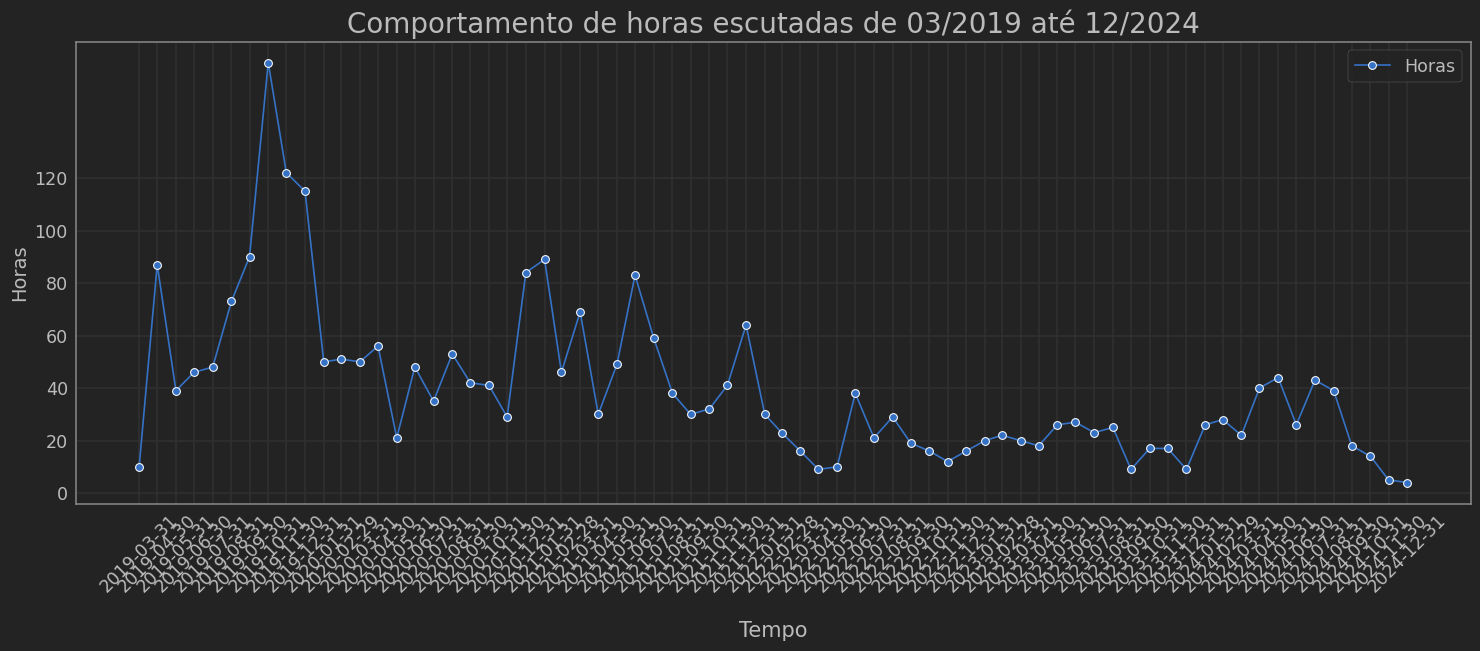

In [67]:
# setando tamanho do gráfico
ax = plt.subplots(figsize=(18, 6))
# atribuindo dados ao gráfico
ax = sns.lineplot(x='endTime',
                  y='hours',
                  data=horas_escutadas_por_mes,
                  marker='o')
# atribuindo titulo
ax.set_title('Comportamento de horas escutadas de {} até {}'.format(
    inicio[3:], fim[3:]),
             fontsize=20)
# setando legenda
ax.legend(['Horas'], loc='upper right')
# titulo label x
ax.set_xlabel('Tempo', fontsize=15, labelpad=18)
# titulo label y
ax.set_ylabel('Horas', fontsize=14)
# setando escala da eixo x
# horas_escutadas_por_mes.index.strftime('%Y-%m')
plt.xticks(horas_escutadas_por_mes.index)
# setando escala da eixo y
plt.yticks([0, 20, 60, 40, 80, 100, 120])

plt.xticks(rotation=45)

# salvando imagem do gráfico
plt.savefig(f'output/figures/{user_name}_horas escutadas.png', bbox_inches='tight')
plt.show()

In [61]:
# criando coluna nova contendo os anos
spotify['year'] = spotify['endTime'].dt.year
# visualizando dados
spotify.head(3)

,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,reason_end,shuffle,skipped,offline,incognito_mode,ts_transformado,offline_timestamp_t,endTime,hours,year
0,"Android OS 9 API 28 (motorola, moto g(6) plus)",0,BR,187.119.230.96,Ta Tum Tum,MC Kevinho,Ta Tum Tum,spotify:track:6etab3UBCo5GOTMZqUvRka,None,None,...,endplay,True,False,False,False,2019-11-11 00:10:22,None,2019-11-11 00:10:22,0.000000,2019
1,"Android OS 9 API 28 (motorola, moto g(6) plus)",0,BR,187.119.230.96,Aperte O Play - Ao Vivo,Simone & Simaria,Aperte O Play!,spotify:track:5M8qHiAV6b0jo3phlyhxcR,None,None,...,endplay,True,False,False,False,2019-11-11 00:11:09,None,2019-11-11 00:11:09,0.000000,2019
2,"Android OS 9 API 28 (motorola, moto g(6) plus)",4886,BR,187.119.230.96,Blurry,Puddle Of Mudd,Come Clean,spotify:track:0FLBNqc5oAiTt4J2e3fe3y,None,None,...,fwdbtn,True,False,False,False,2019-11-11 00:11:16,None,2019-11-11 00:11:16,0.001357,2019


In [62]:
spotify['year'].unique()

array([2019, 2020, 2021, 2022, 2023, 2024], dtype=int32)

In [63]:

# agrupando dados por ano
horas_tocas_por_Ano = spotify.groupby(['year'])[[
    'hours'
]].sum().round(0).reset_index().sort_values(by=['hours'], ascending=False)
# visualizando dados
horas_tocas_por_Ano

,year,hours
0,2019,794.0
2,2021,629.0
1,2020,561.0
5,2024,308.0
3,2022,241.0
4,2023,234.0


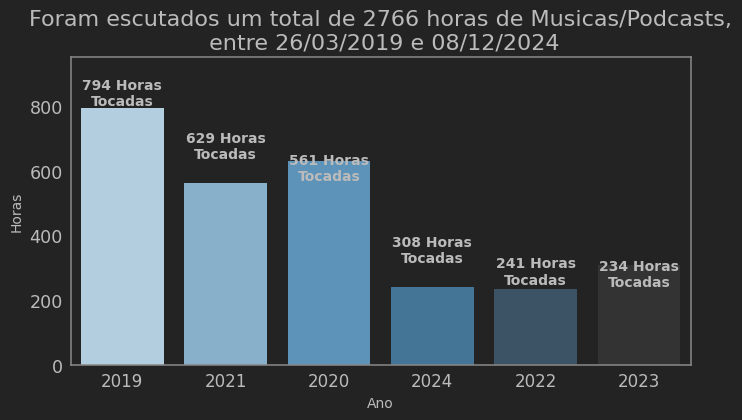

In [82]:
# Definindo variáveis
anos = horas_tocas_por_Ano.year
horas = horas_tocas_por_Ano.hours

# Setando tamanho do gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Atribuindo dados ao gráfico
sns.barplot(x=anos, y=horas, palette="Blues_d", ax=ax, hue=anos, dodge=False, legend=False)

# Setando título
ax.set_title(
    'Foram escutados um total de {} horas de Musicas/Podcasts,\n entre {} e {}'.format(
        int(spotify['hours'].sum().round()), inicio, fim),
    fontsize=16)

# Setando título do eixo X
ax.set_xlabel('Ano', fontsize=10)

# Setando título do eixo Y
ax.set_ylabel('Horas', fontsize=10)

# Definindo ticks fixos para o eixo X antes de setar os rótulos
ax.set_xticks(range(len(anos)))
ax.set_xticklabels(anos, size=12)

# Valor Maximo para o Eixo y
ax.set_ylim(0, max(horas) * 1.2)


# Desativando a grade
ax.grid(False)

# Adicionando anotações às barras
for i, v in enumerate(horas):
    ax.annotate(f"{int(v)} Horas\nTocadas",
                xy=(i, v),
                fontsize=10,
                ha='center',
                va='bottom',
                fontweight='bold')

# Salvando imagem do gráfico
plt.savefig(f'output/figures/{user_name}_horas_escutadas_por_anos.png', bbox_inches='tight')

plt.show()